<a href="https://colab.research.google.com/github/iGEM-UTokyo/2022simulation/blob/main/%E5%8F%8C%E5%AE%89%E5%AE%9A%E3%81%AA%E5%9B%9E%E8%B7%AF%E3%81%AE%E3%83%96%E3%83%BC%E3%83%AA%E3%82%A2%E3%83%B3%E3%82%B7%E3%83%9F%E3%83%A5%E3%83%AC%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

#クラスを定義する

#MemoryクラスとProcessorクラスの親となるParentクラスを定義する
class Parent:
  def __init__(self,ik1:str,ik2:str,ok1:str,ok2:str): #ik1, ik2, ok1, ok2は入力と出力の配線となるキーワード
    self.input_key1 = ik1
    self.input_key2 = ik2
    self.output_key1 = ok1
    self.output_key2 = ok2

#MemoryクラスをParentクラスから継承して作成
class Memory(Parent):
  def __init__(self,ik1,ik2,ok1,ok2):
    if (ik1 == "dummy")or(ik2 == "dummy")or(ok1 == "dummy")or(ok2 == "dummy"):
      print('Error: "dummy" cannot be used for keys', file=sys.stderr)
    super().__init__(ik1,ik2,ok1,ok2)
    self.status = 0 #statusはMaならば0、Mbならば1の状態を表す。Ma、Mbについてはnotion参照。ここではどちらかがオフになるともう一方がオンになるとしている。
  def update(self,S): #入力Aで出力Bを返し、入力Bで出力Aをリストで返す。入力が無いときは前回の出力を返す。
    if (self.input_key1 in S)and(self.input_key2 in S):
      print('Error: Memory status cannot be defined',file=sys.stderr)
    else:
      if self.input_key1 in S:
        self.status = 1
      if self.input_key2 in S:
        self.status = 0
      if self.status == 0:
        return [self.output_key1]
      if self.status == 1:
        return [self.output_key2]

#ProcessorクラスをParentクラスクラスから継承して作成
class Processor(Parent):
  def __init__(self,ik1,ok1,ok2):
    if (ik1 == "dummy")or(ok1 == "dummy")or(ok2 == "dummy"):
      print('Error: "dummy" cannot be used for keys', file=sys.stderr)
    super().__init__(ik1,"dummy",ok1,ok2)
  def update(self,S,L):
    if self.input_key1 in S:
      return [] #Sから入力が入っている時には空リストを返す
    else: #Rが入力にあれば出力Aを、Bが入力にあれば出力Bをリストで返す
      output = []
      if "R" in L:
        output.append(self.output_key1)
      if "B" in L:
        output.append(self.output_key2)
      return output

In [ ]:
#モデルの定義。インスタンスごとの接続はここで作る。
def simulation(Ls):
  S = []
  op = []

  #ikとokを一致させることで入出力を作る。
  m1 = Memory("a","b","c","d")
  m2 = Memory("e","f","g","c")
  Memorys = [m1,m2]

  p1 = Processor("d","a","null")
  p2 = Processor("c","e","b")
  Processors = [p1,p2]

  reporter_key = "g"

  def update(S,L): #Memorys, ProcessorsというMemoryとProcessorのインスタンスのリストがあることを前提としている。
    output = []
    processor_output = []
    #Processorを先に処理する。Processorの結果は次回以降に引き継がれない
    for p in Processors:
      processor_output = processor_output + p.update(S,L)
    for m in Memorys:
      output = output + m.update(S+processor_output)
    return output
  def output(S):
    #print(S)
    if reporter_key in S:
      op.append(0)
    else:
      op.append(1)
  S = update(S,"")
  for L in Ls:
    S = update(S,L)
    output(S)
  return op

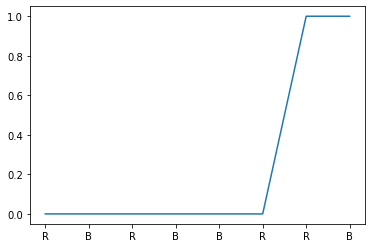

In [ ]:
import matplotlib.pyplot as plt

# Ls = ["RB","R","B"] #同時照射を考えるときはリストで入力
Ls = "RBRBBRRB" #同時照射を考えないときは文字列で入力

#Lsが部分文字列RR(正解の配列)を持つと1（レポーター）が出力される
res = simulation(Ls)
if type(Ls) == str:
  Ls = list(Ls)
plt.plot(res)
plt.xticks(range(len(Ls)),Ls)

plt.show()